<a href="https://www.kaggle.com/code/omarmagdy33/notebook1?scriptVersionId=149545002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('/kaggle/input/50ulke/50lke.csv')

In [3]:
df.drop(['SIRALAMA'],axis=1,inplace=True)

In [4]:
df.drop(['2023'],axis=1,inplace=True)

In [5]:
df.drop(['SIRALAMA.2'],axis=1,inplace=True)

In [6]:
df = df.rename(columns={'ÜLKELER': 'Countries', 'MİLLİ GELİR': 'National Income', 'BÜYÜME': 'Growth', 'KİŞİ BAŞINA':'Per person','KITA':'Continents'})


In [7]:
df.describe()

,National Income,Growth,Per person
count,50.000000,50.000000,50.000000
mean,1646.348200,3.320400,27696.000000
std,3448.554429,2.053468,25094.131496
min,231.570000,-0.740000,1615.000000
25%,353.440000,1.795000,6402.000000
50%,522.985000,2.880000,14565.500000
75%,1504.895000,4.287500,48738.250000
max,20412.870000,7.810000,86835.000000


In [8]:
df.isna().sum()

Countries          0
National Income    0
Growth             0
Per person         0
Continents         0
dtype: int64

In [9]:
df[['National Income','Per person','Growth']].corr()

,National Income,Per person,Growth
National Income,1.000000,0.159121,0.008961
Per person,0.159121,1.000000,-0.252786
Growth,0.008961,-0.252786,1.000000


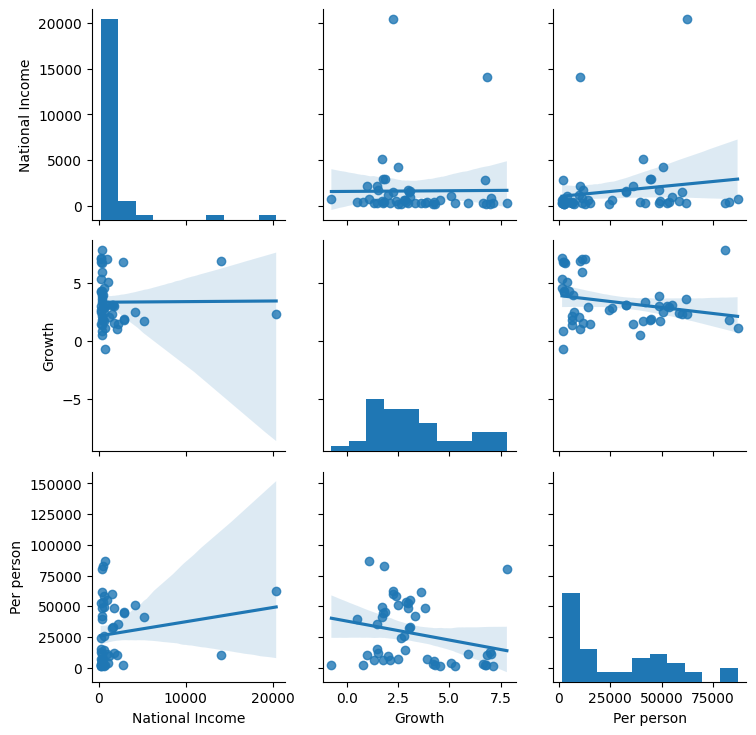

In [10]:
g = sns.PairGrid(df)
g=g.map_diag(plt.hist)
g=g.map_offdiag(sns.regplot)

<Axes: >

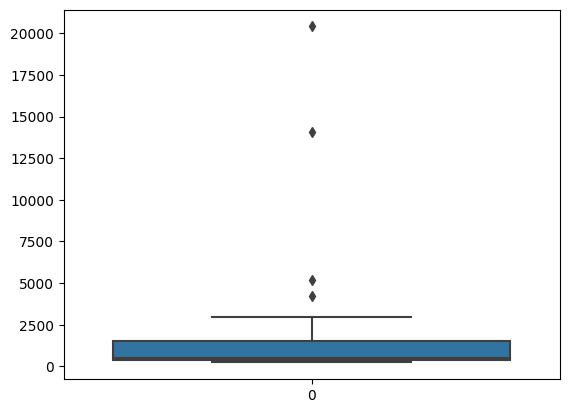

In [11]:
sns.boxplot(df["National Income"])

<Axes: >

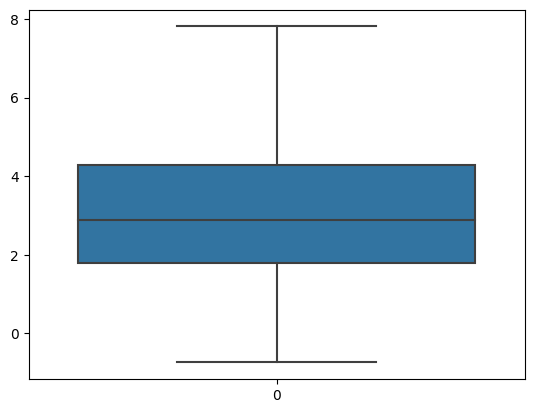

In [12]:
sns.boxplot(df["Growth"])

<Axes: >

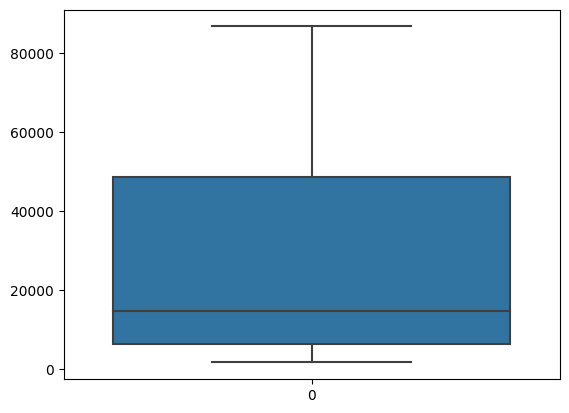

In [13]:
sns.boxplot(df["Per person"])

In [14]:
df["Continent"]=df["Countries"].apply(lambda x: "Europe" if x=="Denmark" else "South America" if x=="Peru"  else "Asia" if x=="Vietnam" else x)

In [15]:
outmean=df["National Income"].mean()

In [16]:
outstd=df["National Income"].std()

In [17]:
outers=(df["National Income"]-outmean)>outstd

In [18]:
df[outers]["National Income"]

0    20412.87
1    14092.51
2     5167.05
Name: National Income, dtype: float64

In [19]:
usedmean=df["National Income"].mean()

In [20]:
df["National Income"].replace({df[outers]["National Income"][0]:0},inplace=True)
df["National Income"].replace({df[outers]["National Income"][1]:0},inplace=True)
df["National Income"].replace({df[outers]["National Income"][2]:0},inplace=True)



In [21]:
df["National Income"].fillna(0,inplace=True)
df["National Income"].replace({0:df["National Income"].mean()},inplace=True)

<Axes: >

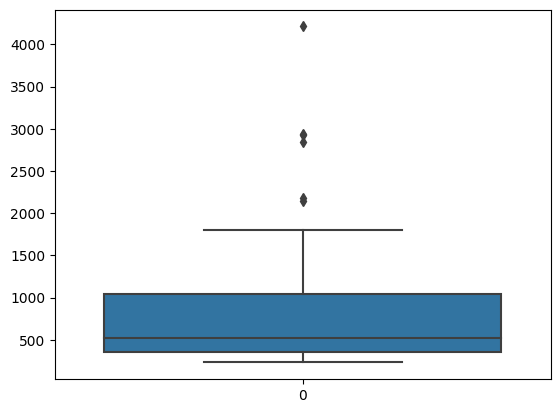

In [22]:
sns.boxplot(df["National Income"])

In [23]:
m_other_outliers=df["National Income"].mean()

In [24]:
otherstd=df["National Income"].std()

In [25]:
outs=(df["National Income"]-m_other_outliers)>otherstd

In [26]:
df[outs]["National Income"]

3    4211.64
4    2936.29
5    2925.10
6    2848.23
7    2181.97
8    2138.92
9    1798.51
Name: National Income, dtype: float64

In [27]:
df["National Income"].replace({df[outs]["National Income"][3]:0},inplace=True)
df["National Income"].replace({df[outs]["National Income"][5]:0},inplace=True)
df["National Income"].replace({df[outs]["National Income"][6]:0},inplace=True)
df["National Income"].replace({df[outs]["National Income"][7]:0},inplace=True)
df["National Income"].replace({df[outs]["National Income"][8]:0},inplace=True)
df["National Income"].replace({df[outs]["National Income"][9]:0},inplace=True)



In [28]:
df["National Income"].fillna(0,inplace=True)
df["National Income"].replace({0:usedmean},inplace=True)

In [29]:
o1=(df["National Income"]-df["National Income"].mean())

In [30]:
o2=o1>df["National Income"].std()

In [31]:
df[o2]["National Income"]

3     1646.3482
4     2936.2900
5     1646.3482
6     1646.3482
7     1646.3482
8     1646.3482
9     1646.3482
10    1719.9000
11    1693.2500
12    1506.4400
13    1500.2600
Name: National Income, dtype: float64

In [32]:
df["National Income"].replace({df[o2]["National Income"][3]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][4]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][5]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][6]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][7]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][8]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][9]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][10]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][11]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][12]:0},inplace=True)
df["National Income"].replace({df[o2]["National Income"][13]:0},inplace=True)


In [33]:
df["National Income"].fillna(0,inplace=True)
df["National Income"].replace({0:usedmean},inplace=True)

<Axes: >

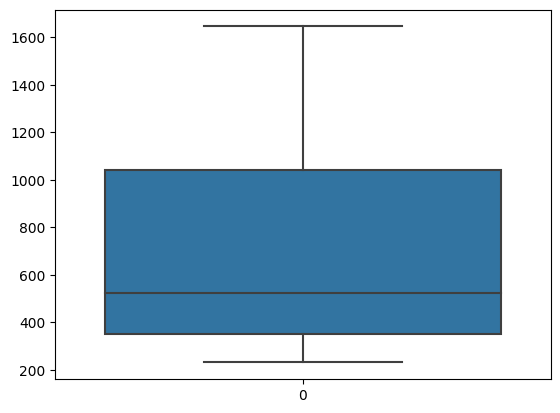

In [34]:
sns.boxplot(df["National Income"])

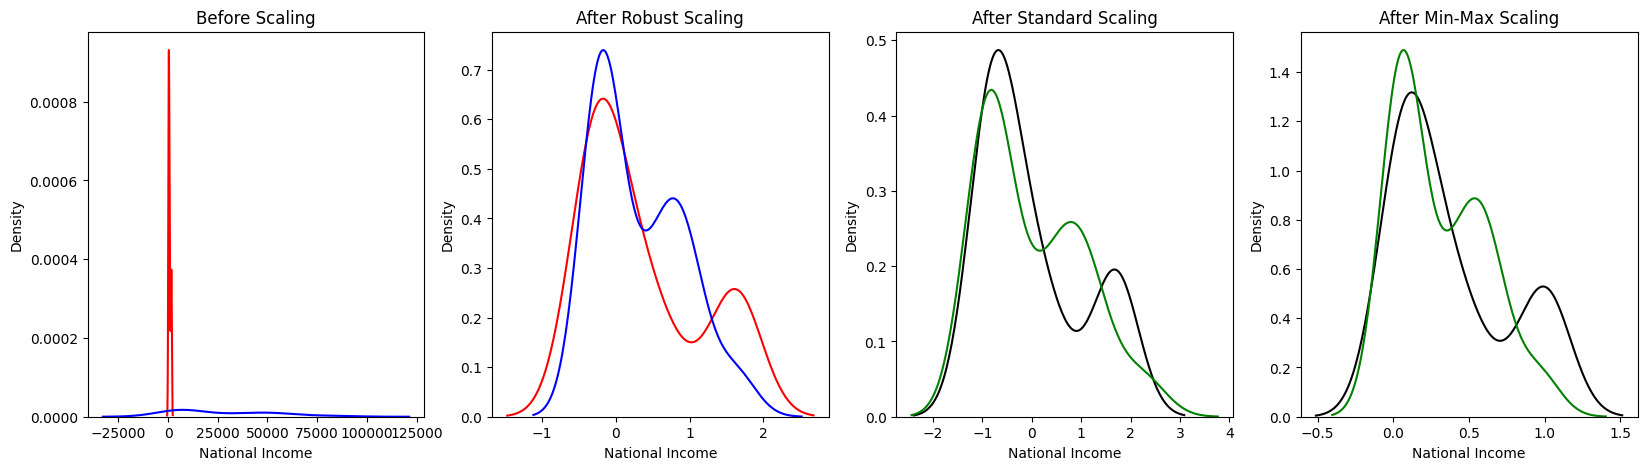

In [35]:
rs=preprocessing.RobustScaler()
robust_df = rs.fit_transform(df[['National Income','Per person']])
robust_df = pd.DataFrame(robust_df, columns =['National Income','Per person'])
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df[['National Income','Per person']])
standard_df = pd.DataFrame(standard_df, columns =['National Income','Per person'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[['National Income','Per person']])
minmax_df = pd.DataFrame(minmax_df, columns =['National Income','Per person'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(df['National Income'], ax = ax1, color ='r')
sns.kdeplot(df['Per person'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['National Income'], ax = ax2, color ='red')
sns.kdeplot(robust_df['Per person'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['National Income'], ax = ax3, color ='black')
sns.kdeplot(standard_df['Per person'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['National Income'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['Per person'], ax = ax4, color ='g')
plt.show()